# <h1><center>Sentiment Classification on IMDB Dataset</center></h1>


<h1>    Contents </h1>

### 1. Importing Modules 
### 2. Exploratory Data Analysis
### 3. Data Cleaning
### 4. Models (SVC, Logistic Regression, MLP, LSTM)
### 5. Conclusion
### 6. Scope of Improvement

## 1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
from bs4 import BeautifulSoup
import tensorflow as tf
from tensorflow import keras
from keras.layers import Embedding,LSTM,Dense
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Conv1D,LSTM,GRU,BatchNormalization,Flatten,Dense
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

###############################################################################
###############################################################################


nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. Data Analysis

In [2]:
data = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<Axes: xlabel='sentiment', ylabel='count'>

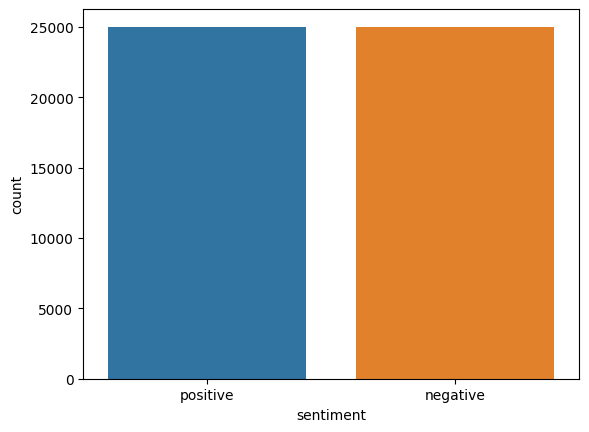

In [4]:
sns.countplot(x=data["sentiment"])

* **Replacing positive and negative with 1 and 0**

In [5]:
data.sentiment=data.sentiment.replace("positive",1)
data.sentiment=data.sentiment.replace("negative",0)

In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# Visualising WordCloud for Positive and Negative reviews.

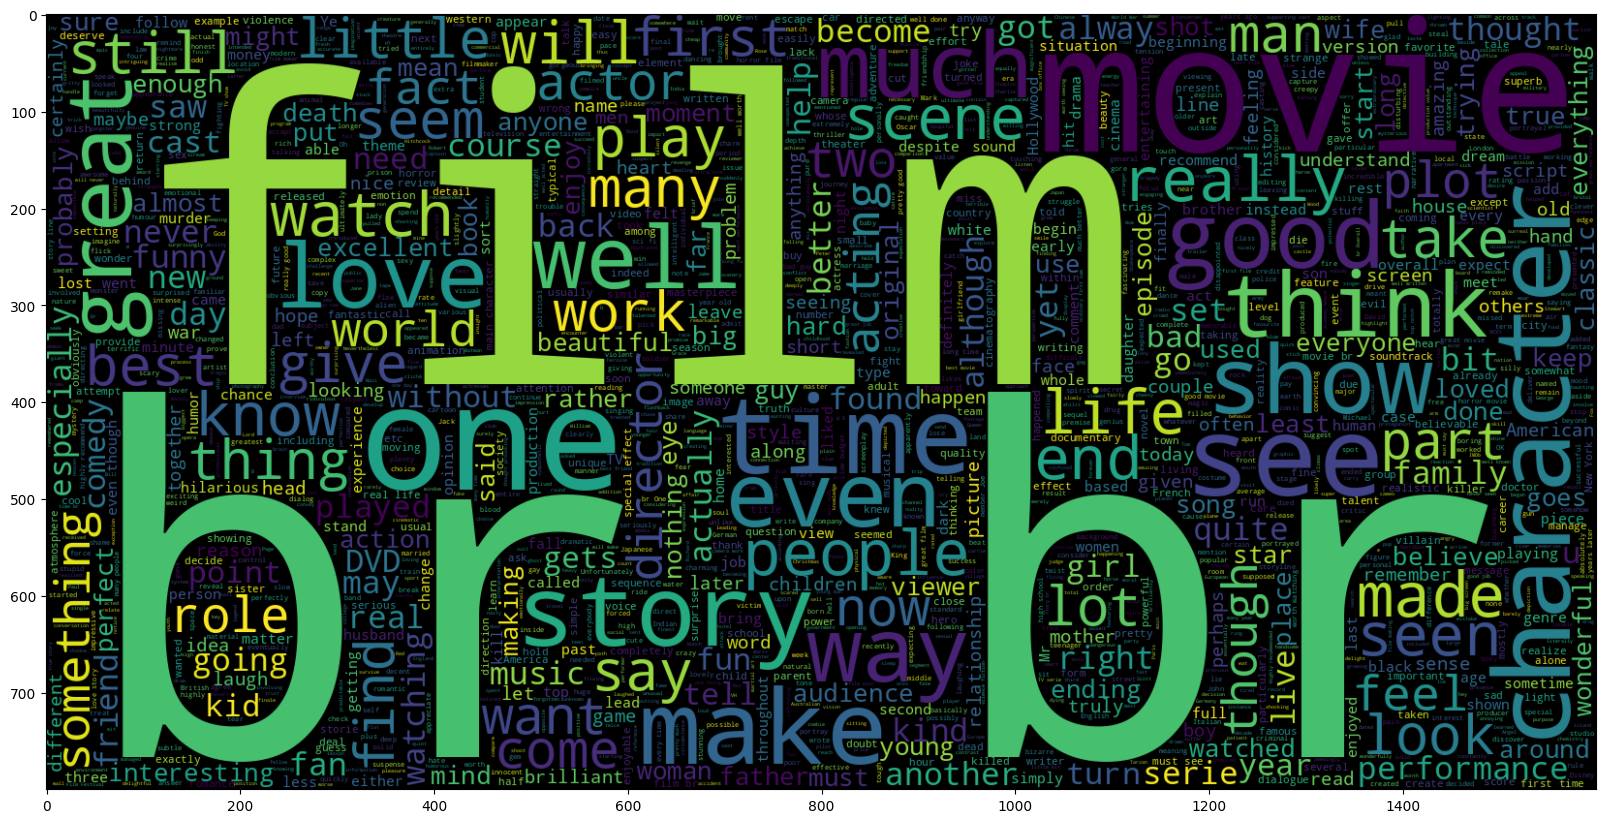

In [7]:
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data.review[data.sentiment == 1]))
plt.imshow(wc , interpolation = 'bilinear')

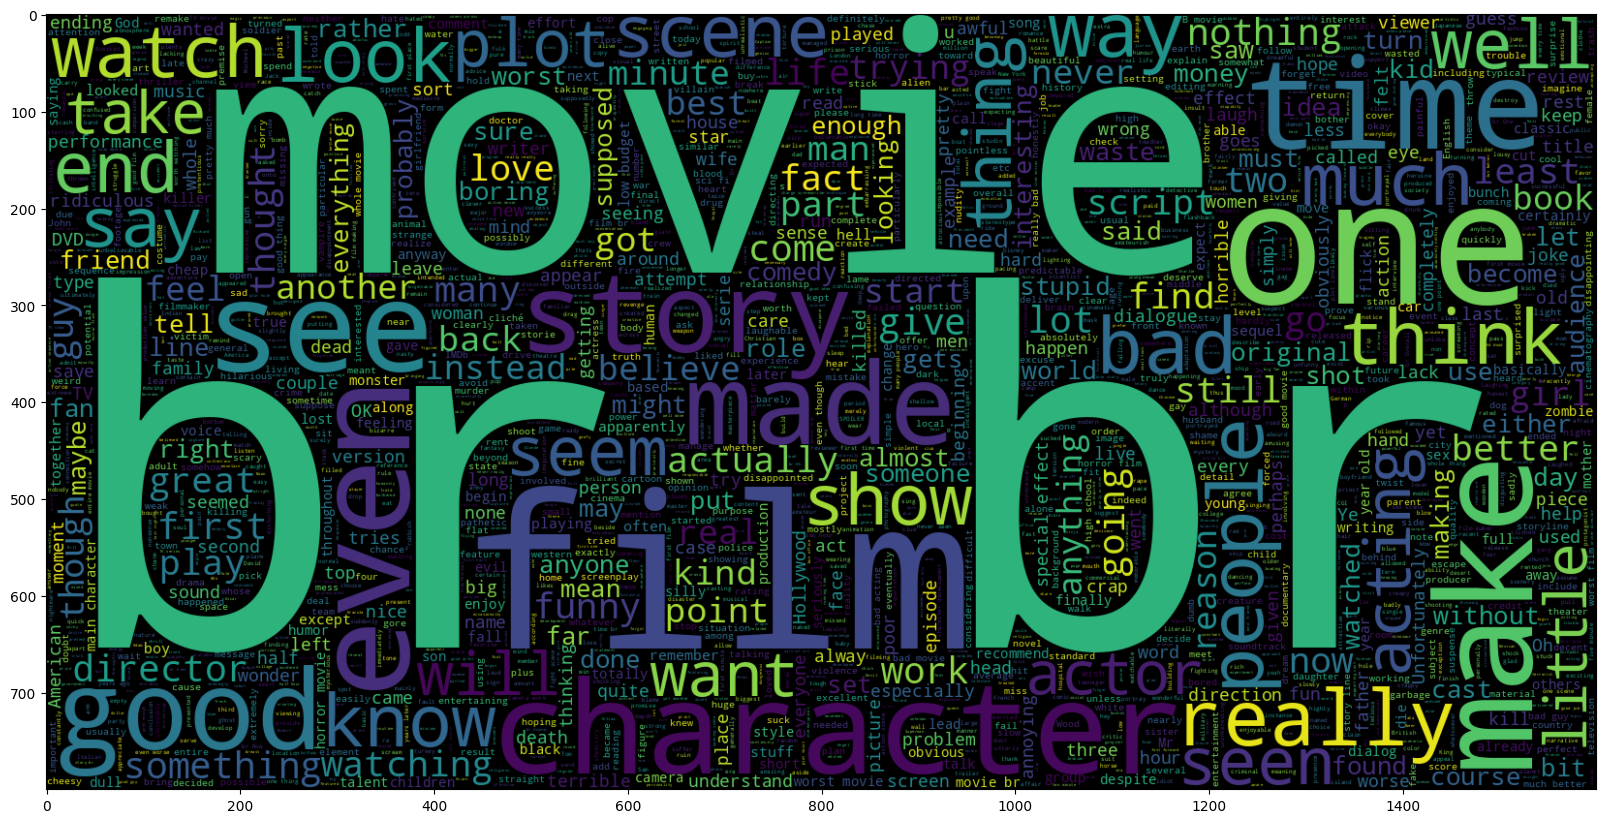

In [8]:
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 0].review))
plt.imshow(wc , interpolation = 'bilinear')

# 3. Data Cleaning
### Here we would want to remove all the strings from the data that are likely to not contribute anything important. Such strings are called Stopwords. nltk is a library which provides lots of common stopwords which can be filtered outfrom the data. 

In [9]:
stop = set(stopwords.words('english'))

In [10]:
def clean_review_data(text):

    """
    text: A sentence from the review dataset
    """

    # extract the html content
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # remove the "...." and links from the string
    text = re.sub('\[[^]]*\]', '', text)
    text = re.sub(r'http\S+', '', text)

    # Finally remove all the stopwords
    word = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            word.append(i.strip().lower())

    text = " ".join(word)

    return text

In [11]:
data.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [12]:
data["review"] = data["review"].apply(clean_review_data)

/tmp/ipykernel_26/1972491279.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [13]:
data.review[0]

'one reviewers mentioned watching oz episode exactly happened first thing struck oz brutality unflinching scenes set right word trust show faint hearted show pulls punches regards sex classic use called oz nickname given oswald maximum security state focuses mainly emerald experimental section prison cells glass fronts face privacy high em city home irish death dodgy dealings shady agreements never far would say main appeal show due fact goes shows forget pretty pictures painted mainstream forget forget mess first episode ever saw struck nasty say ready watched developed taste got accustomed high levels graphic injustice guards sold inmates kill order get away well middle class inmates turned prison bitches due lack street skills prison watching may become comfortable uncomfortable get touch darker'

# 4. Models

In [14]:
X = data["review"]
y = data["sentiment"]

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Tokenizing the data

In [16]:
vectorize=TfidfVectorizer(max_features=2000)
X_train = vectorize.fit_transform(X_train)
X_test = vectorize.transform(X_test)

**Logestice Regression**

In [17]:
LR_classifier = LogisticRegression(max_iter=500)
LR_classifier.fit(X_train, y_train)
pickle.dump(LR_classifier,open('LR_classifier.pkl','wb'))

**MLP Classifier**

In [18]:
#ml_classifier = MPLClassifier(max_iters = 300)
ML_classifier=MLPClassifier(hidden_layer_sizes=(300,), activation='relu',max_iter = 500)
ML_classifier.fit(X_train,y_train)
pickle.dump(ML_classifier,open('ML_classifier.pkl','wb'))

**State Vector Classifier**

In [19]:
# SVC = SVC(kernel='linear')
SV_classifier=SVC(max_iter=100000)
SV_classifier.fit(X_train,y_train)
pickle.dump(SV_classifier,open('SV_classifier.pkl','wb'))

In [20]:
def predict_accuracy(model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [21]:
acc = predict_accuracy(LR_classifier)
print("Accuracy of the Logestic Regression Model on test data is:", acc)
acc = predict_accuracy(ML_classifier)
print("Accuracy of the Multi layer model on test data is:", acc)
accuracy = predict_accuracy(SV_classifier)
print("Accuracy of the SVC model on test data is:", accuracy)

Accuracy of the Logestic Regression Model on test data is: 0.8625
Accuracy of the Multi layer model on test data is: 0.857
Accuracy of the SVC model on test data is: 0.8644


## Training a Bidirectional LSTM model

In [22]:
X = data.review
y = to_categorical(data["sentiment"], num_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [23]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

In [24]:
X_train_padded = pad_sequences(X_train, maxlen=2000)
X_test_padded = pad_sequences(X_test, maxlen=2000)

In [25]:
model = keras.Sequential()
model.add(Embedding(80000,300,input_length=2000))
model.add(keras.layers.Bidirectional(LSTM(128,return_sequences=True)))
model.add(LSTM(64))
model.add(keras.layers.Dropout(0.4))
model.add(Dense(2,activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2000, 300)         24000000  
                                                                 
 bidirectional (Bidirection  (None, 2000, 256)         439296    
 al)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 24521602 (93.54 MB)
Trainable params: 24521602 (93.54 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [26]:
callbacks=[ModelCheckpoint(filepath='./', monitor="val_accuracy", verbose=0, save_best_only=True)]

history=model.fit(X_train_padded,y_train,validation_data=(X_test_padded,y_test),epochs=3)

Epoch 1/3
1329/1329 [==============================] - 401s 297ms/step - loss: 0.3840 - accuracy: 0.8332 - val_loss: 0.2985 - val_accuracy: 0.8765
Epoch 2/3
1329/1329 [==============================] - 296s 223ms/step - loss: 0.1959 - accuracy: 0.9277 - val_loss: 0.3441 - val_accuracy: 0.8616
Epoch 3/3
1329/1329 [==============================] - 292s 220ms/step - loss: 0.1075 - accuracy: 0.9617 - val_loss: 0.4134 - val_accuracy: 0.8627


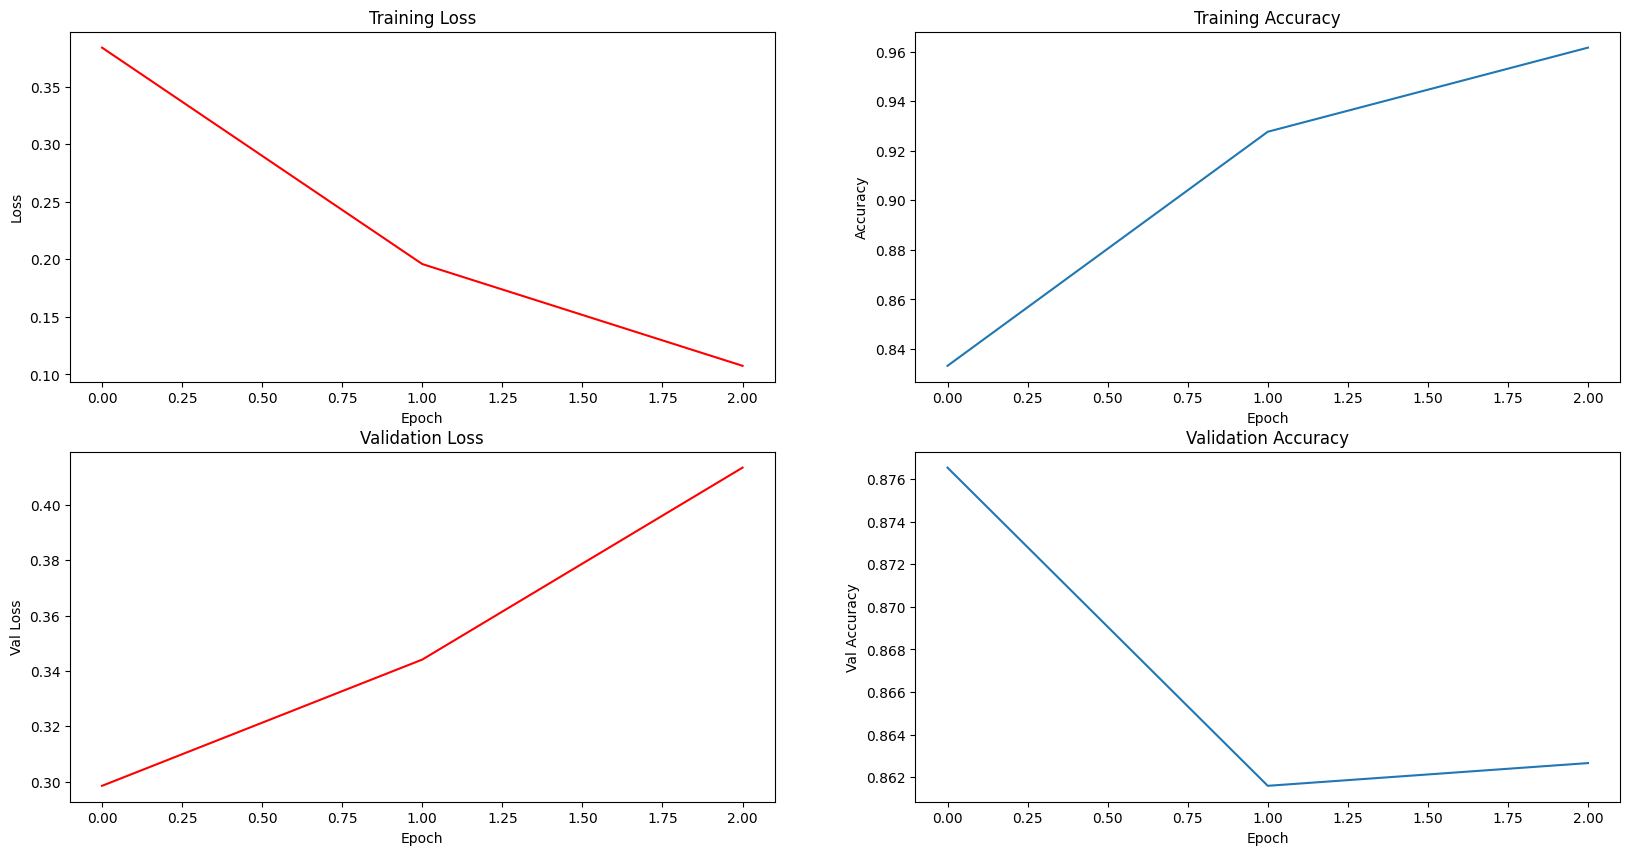

In [27]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(history.history['loss'], color='red')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].set_title('Training Loss')

axs[0, 1].plot(history.history['accuracy'])
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].set_title('Training Accuracy')


axs[1, 0].plot(history.history['val_loss'], color='red')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Val Loss')
axs[1, 0].set_title('Validation Loss')

axs[1, 1].plot(history.history['val_accuracy'])
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Val Accuracy')
axs[1, 1].set_title('Validation Accuracy')

plt.show()

# 5. Conclusion
* ####  We tried Two types of models. Supervised Machine Learning(LR, SVC, Bayes) and Neural Networks (MLP, LSTM)
     
* ####  Among all LSTM performed the best with validation accuracy over 87.5% on test data.

# Future Scope

#### 1. We have used TFIDF for vectorization however there are many dense word vector packages like GloVe and Fastext which contains pretrained word embedding models trained on large corpus of data. Utilizing such word embedding models may lead to higher accuracy.

#### 4. The LSTM model is bidirectional with only 2 layers, further increasing the layer may converge the loss faster but will have to trade off with the validation accuracy. However the pytorch implementation of the same model gives us extra control over hidden_states (h_o, c_o) thus passing them through a layer of network may further increase the validation accuracy.

#### 5. We can fine tune our dataset with transformers such as BERT, as they already have pretrained models for binary classification it may lead to a significantly high accuracy

# **Thanks For Reading!!**